# 2024-Spring-BUAN-6382, Applied Deep Learning
# MNIST Classifier

mnist_classifier_simple.ipynb

2024.01.29

In [23]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
import tensorflow as tf
print("tf ver = ",tf.__version__)  #1.14.0
import keras
import keras.utils as kutils
# print("keras ver =", keras.__version__) #2.2.4
import pandas as pd
print("pandas ver =", pd.__version__) #0.25.2
import numpy as np
print("numpy ver =", np.__version__) # 1.16.1 (after >conda install numpy==1.16.1)   ow 1.16.5  as of 2019.10.10

# from tensorflow.keras.utils import to_categorical

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

tf ver =  2.15.0
pandas ver = 1.5.3
numpy ver = 1.23.5


# Load data

In [8]:

%%time
from keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data( )
print(train_data.shape) # (60000, 28, 28)
print(test_data.shape)  # (10000, 28, 28)
print(train_labels.shape) # (60000,)
print(test_labels.shape)  # (10000,)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
CPU times: user 269 ms, sys: 15.2 ms, total: 284 ms
Wall time: 290 ms


# Increase width of printed lines
* https://stackoverflow.com/questions/25583428/ipython-how-to-set-terminal-width

        You can see your current line width with

        numpy.get_printoptions()['linewidth']
        and set it with

        numpy.set_printoptions(linewidth=160)

In [10]:
np.get_printoptions()['linewidth']

75

In [11]:
np.set_printoptions(linewidth=160)

In [12]:
print(train_data[1,:,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [13]:
print(train_data.ndim)
print(train_labels.ndim)

3
1


In [14]:
print(train_data.dtype)
print(train_labels.dtype)

uint8
uint8


In [15]:
# train_data

In [16]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
28*28

784

# Convert images to sequences

In [18]:
train_images = train_data.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_data.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [19]:
print("-------- ndim/rank:", train_images.ndim)
print("-------- shape:",     train_images.shape)
print("-------- dtype:",     train_images.dtype)

-------- ndim/rank: 2
-------- shape: (60000, 784)
-------- dtype: float32


In [25]:
np.set_printoptions(edgeitems=30, linewidth=100000,  formatter=dict(float=lambda x: "%.3g" % x))

In [26]:
# from tensorflow.python.keras.utils import to_categorical
train_labels_cat = kutils.to_categorical(train_labels)
test_labels_cat = kutils.to_categorical(test_labels)

In [27]:
type(train_labels_cat)

numpy.ndarray

In [30]:
print(len(train_labels))
print(train_labels_cat.shape)

60000
(60000, 10)


In [31]:

print("-------- ndim/rank:")
print(train_labels.ndim)
print(train_labels_cat.ndim)
print("-------- shape:")
print(train_labels.shape)
print(train_labels_cat.shape)
print("-------- dtype:")
print(train_labels.dtype)
print(train_labels_cat.dtype)

-------- ndim/rank:
1
2
-------- shape:
(60000,)
(60000, 10)
-------- dtype:
uint8
float32


In [33]:
print(train_labels[:5])
print(train_labels_cat[:5,:])

[5 0 4 1 9]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


# Define Network Layers

$$
a_1 = \text{ReLU}(w_0 + w_1x_1 \dots + w_kx_k)
$$

In [37]:
# from keras.datasets import mnist
from tensorflow.python.keras import models
from tensorflow.python.keras import layers


from keras.models import Sequential

model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax')) #The second layer didn’t receive an input shape argument—instead,
# it automatically inferred its input shape as being the output shape of the layer that came before.

# Define Network Layers

$$
a_1 = \text{ReLU}(w_{1,0} + w_{1,1}x_1 \dots + w_{1,k}x_k)\\
a_2 = \text{ReLU}(w_{2,0} + w_{2,1}x_1 \dots + w_{2,k}x_k\\
\dots\\
a_{512} = \text{ReLU}(w_{512,0} + w_{512,1}x_1 \dots + w_{512,k}x_k)
$$


In Matrix Form:

$\displaystyle \vec{a}= \text{ReLU}( \ W\vec{x} + \vec{b}\ )
$

Matrix $W$ has size is 512 by k.

$\vec{b} = [w_{1,0}, w_{2,0}, \dots, w_{512,0}]^T$ is a column vector of length 512.

$\vec{x} = [x_{1}, x_{2}, \dots, x_{k}]^T$ is a column vector of length k=784.

### Configure the learning process (loss, optimizer, etc)

In [38]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Train

In [40]:
%%time
#We’re now ready to train the network, which in Keras is done via a call to the network’s
#fit method — we fit the model to its training data:
model.fit(train_images, train_labels_cat, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1082 - accuracy: 0.9679
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0711 - accuracy: 0.9790
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0510 - accuracy: 0.9842
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9882
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9912
CPU times: user 8.15 s, sys: 1.19 s, total: 9.33 s
Wall time: 10.9 s


In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9816
test_acc: 0.9815999865531921


In [42]:
img=test_data[0]
img.shape

(28, 28)

In [43]:
img = train_data[0]
img.shape

(28, 28)

<ipython-input-44-7695b2dca52f>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


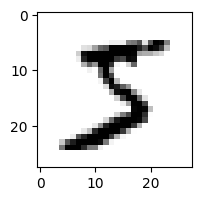

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
save_figures = True
plt.figure(figsize=(2,4))
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

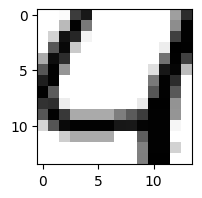

In [45]:
my_slice = test_data[4, 7:-7, 7:-7]
plt.figure(figsize=(2,4))
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

# Classification Loss Functions


The math formula for loss in a classification model depends on the specific type of model and loss function being used. One commonly used loss function for binary classification is the binary cross-entropy loss, which is given by:

$$L(y, y_{hat}) = -[y \log(y_{hat}) + (1-y) \log(1-y_{hat})]$$

where y is the true label (0 or 1) and y_hat is the predicted probability of the positive class (between 0 and 1).

For multiclass classification, one common loss function is the categorical cross-entropy loss, which is given by:

$$L(y, y_{hat}) = - \sum(y \log(y_{hat}))$$

where y is a one-hot vector representing the true class and y_hat is a vector of predicted probabilities for each class.

# Let's examine the network we used in this code

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrap  (None, 512)               401920    
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 10)                5130      
 apper)                                                          
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# (28*28)*512 + 512 = 401920
# Kernel
model.layers[0].weights[0]

<tf.Variable 'module_wrapper/dense_2/kernel:0' shape=(784, 512) dtype=float32, numpy=
array([[-0.0448, -0.0347, 0.0365, -0.011, -0.0278, 0.0179, -0.000386, 0.0204, -0.0591, 0.051, -0.0161, -0.0328, -0.031, -0.0419, -0.0281, -0.0393, -0.0642, 0.0575, 0.0117, 0.0325, 0.0617, -0.0146, -0.0656, -0.0559, -0.0642, 0.00151, 0.0315, 0.00735, 0.00824, -0.0196, ..., -0.0666, 0.0669, 0.0496, 0.04, 0.0382, -0.0554, -0.0466, -0.041, 0.038, 0.0491, -0.0644, -0.0294, -0.05, -0.052, -0.0414, 0.0489, 0.0658, -0.0647, -0.00715, 0.0454, -0.0577, 0.0244, -0.0483, 0.0536, -0.0489, 0.0646, -0.0072, 0.0351, -0.0539, -0.0228],
       [-0.0578, 0.011, -0.0476, 0.0541, 0.0229, -0.0106, 0.0537, -0.0139, 0.0117, 0.0132, -0.0291, 0.0258, 0.066, -0.0496, -0.00786, 0.0589, 0.0581, -0.0383, 0.0197, 0.0134, -0.0388, -0.0232, -0.0381, 0.0224, 0.0556, -0.0412, -0.0104, 0.0481, -0.0332, -0.0162, ..., -0.059, -0.0565, -0.00397, 0.0523, 0.00486, 0.0169, -0.0292, 0.0367, 0.0011, 0.0536, -0.0576, 0.0623, 0.0234, 0.0286, 0.05

In [48]:
# Bias
print((model.layers[0].weights[1]))
model.layers[0].weights[1][:20]

<tf.Variable 'module_wrapper/dense_2/bias:0' shape=(512,) dtype=float32, numpy=array([0.0309, 0.026, -0.0302, 0.0303, -0.0184, -0.00934, -0.0138, 0.0594, -0.0218, -0.0101, -0.00277, -0.000771, 0.033, -0.0154, -0.021, 0.00733, 0.00901, -0.0325, 0.0139, -0.0681, 0.108, 0.0285, -0.0425, -0.037, -0.0404, -0.0199, 0.0225, 0.031, 0.0528, -0.0187, 0.0514, 0.0338, -0.0149, -0.0414, 0.023, -0.0395, 0.0597, 0.00268, -0.0426, -0.019, -0.0319, -0.0288, 0.0251, 0.0169, 0.042, -0.0143, -0.0934, 0.0154, 0.0276, 0.0171, 0.0106, 0.0096, 0.0335, 0.0597, 0.0548, 0.0153, -0.017, -0.0219, -0.0105, -0.00833, -0.049, 0.0109, 0.00634, 0.0202, 0.0643, -0.0262, -0.0321, -0.0109, -0.0156, -0.0184, -0.0238, 0.00239, 0.0348, -0.0574, -0.041, -0.0376, 0.00817, 0.0269, 0.0579, 0.0146, -0.0935, -0.0149, -0.0206, -0.00646, 0.0122, -0.0163, -0.0197, 0.0455, 0.00942, -0.0569, -0.0333, 0.0482, 0.00751, -0.0178, 0.0621, -0.00913, 0.104, 0.029, 0.031, -0.0571, -0.0176, 0.00551, -0.0236, 0.03, 0.0062, 0.0711, -0.00471, 0.07

<tf.Tensor: shape=(20,), dtype=float32, numpy=array([0.0309, 0.026, -0.0302, 0.0303, -0.0184, -0.00934, -0.0138, 0.0594, -0.0218, -0.0101, -0.00277, -0.000771, 0.033, -0.0154, -0.021, 0.00733, 0.00901, -0.0325, 0.0139, -0.0681], dtype=float32)>

In [49]:
model.layers[1].weights[0]

<tf.Variable 'module_wrapper_1/dense_3/kernel:0' shape=(512, 10) dtype=float32, numpy=
array([[-0.0898, -0.022, -0.0749, -0.251, 0.191, 0.00315, -0.392, 0.171, -0.215, -0.0853],
       [0.083, 0.0206, 0.0366, -0.164, 0.186, 0.0818, 0.027, -0.15, -0.0805, -0.185],
       [0.2, -0.202, 0.137, -0.139, 0.105, -0.306, -0.155, -0.0532, -0.258, 0.109],
       [0.0225, -0.147, -0.0348, 0.0271, 0.0597, 0.0193, 0.027, -0.142, 0.0954, -0.0244],
       [0.0957, -0.239, -0.0828, 0.123, -0.28, -0.073, -0.11, 0.115, 0.147, -0.117],
       [-0.0785, 0.0355, 0.059, -0.149, -0.125, -0.132, -0.288, 0.0899, 0.0719, -0.168],
       [-0.0367, -0.0549, -0.0573, -0.104, 0.0947, -0.00652, 0.0684, -0.0709, 0.0925, -0.0977],
       [-0.0689, 0.163, -0.41, -0.151, 0.167, 0.115, 0.144, -0.381, -0.0327, -0.244],
       [-0.238, 0.0619, 0.0691, 0.166, 0.237, -0.426, -0.107, 0.0645, -0.112, -0.115],
       [0.12, 0.0508, -0.111, -0.204, 0.0924, 0.152, -0.224, 0.00926, -0.357, 0.0378],
       [-0.106, -0.183, -0.291, 

In [50]:
model.layers[1].weights[1]


<tf.Variable 'module_wrapper_1/dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([-0.0551, -0.0336, -0.0209, -0.0287, 0.0174, 0.0541, -0.0298, -0.0109, 0.0851, -0.0121], dtype=float32)>

In [50]:
Reference: BUAN 6382.SW1.S24 course by Dr Farid Khafizov at Naveen Jindal School to Management, UTDallas.